### 1) Текстовое описание набора данных

Датасет: suicide-rates-overview-1985-to-2016.csv

Источник: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

Зависимость количества самоубийств по годам и странам от социальных (возраст, пол, поколение) и экономических составляющих (ИЧР, ВВП)

Колонки:
* country – страна
* year – год (1985 - 2016)
* sex – пол
* age – возраст (6 диапазонов)
* suicides_no – кол-во самоубийств
* population – кол-во людей в данном возрастном диапазоне
* suicides/100k pop - suicides_no / (population / 100 000)
* country-year – конкатенация страна + год
* HDI for year – Human Development Index – Индекс человеческого развития
* gdp_for_year (doll.) – ВВП на год
* gdp_per_capita (doll.) – ВВП на человека
* generation – поколение (базируется на среднем значении для данного возраста) – всего 6


### 2) Основные характеристики датасета

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/suicide-rates-overview-1985-to-2016.csv', sep=',', thousands=',')

In [3]:
data.shape

(27820, 12)

In [4]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [6]:
def count_empty_values(data):
    for col in data.columns:
        temp_null_count = data[data[col].isnull()].shape[0]
        print('{} - {}'.format(col, temp_null_count))

count_empty_values(data)

country - 0
year - 0
sex - 0
age - 0
suicides_no - 0
population - 0
suicides/100k pop - 0
country-year - 0
HDI for year - 19456
 gdp_for_year ($)  - 0
gdp_per_capita ($) - 0
generation - 0


In [7]:
# удалим пустые значения
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
count_empty_values(data)

country - 0
year - 0
sex - 0
age - 0
suicides_no - 0
population - 0
suicides/100k pop - 0
country-year - 0
HDI for year - 0
 gdp_for_year ($)  - 0
gdp_per_capita ($) - 0
generation - 0


In [8]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,8364.000000,8364.000000,8.364000e+03,8364.000000,8364.000000,8.364000e+03,8364.000000
mean,2005.348637,206.124342,1.852173e+06,11.991936,0.776601,5.476639e+11,21074.371593
std,8.803020,681.004457,3.969754e+06,17.361772,0.093367,1.720106e+12,22579.186968
min,1985.000000,0.000000,8.750000e+02,0.000000,0.483000,3.962700e+08,313.000000
25%,2000.000000,3.000000,1.216425e+05,1.040000,0.713000,1.430751e+10,4862.000000
50%,2010.000000,27.000000,4.722505e+05,5.720000,0.779000,6.175779e+10,12584.000000
75%,2012.000000,127.250000,1.500290e+06,15.442500,0.855000,3.115395e+11,30271.000000
max,2014.000000,11767.000000,4.350934e+07,187.060000,0.944000,1.742761e+13,126352.000000


### 3) Визуальное исследование датасета

#### Диаграмма рассеяния

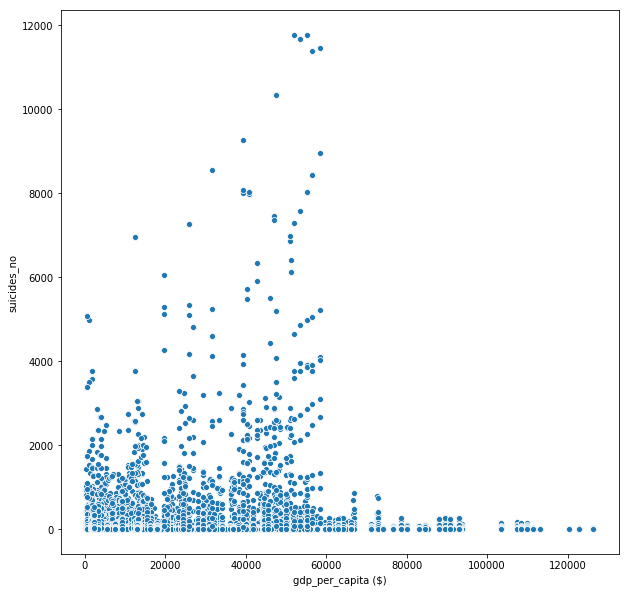

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='gdp_per_capita ($)', y='suicides_no', data=data)

Очевидна обратная зависимость: чем больше ВВП на человека, тем меньше кол-во самоубийств.

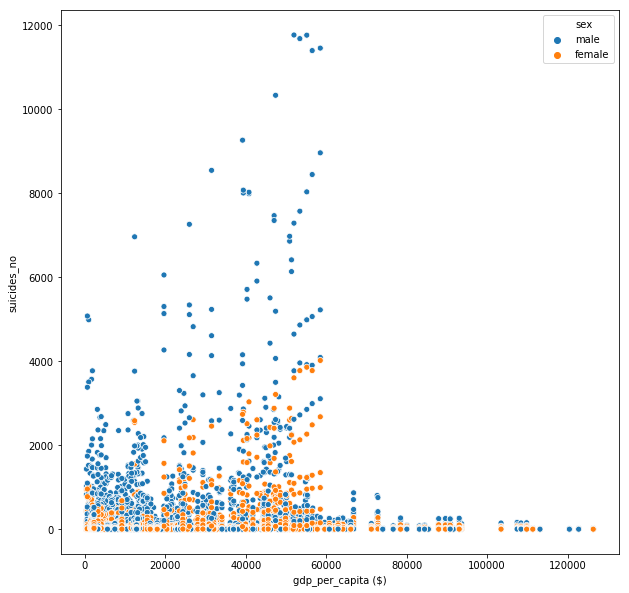

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='gdp_per_capita ($)', y='suicides_no', data=data, hue='sex')

Больше самоубийств среди мужчин.

#### Гистограмма

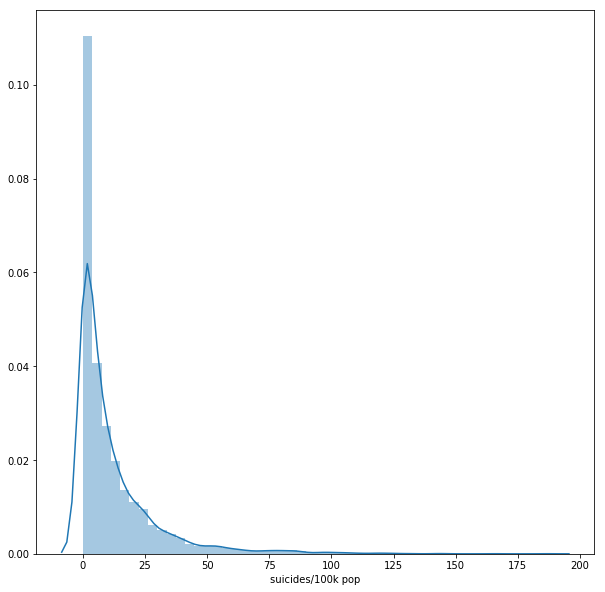

In [11]:
# плотность вероятности распределения
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['suicides/100k pop'])

#### Jointplot

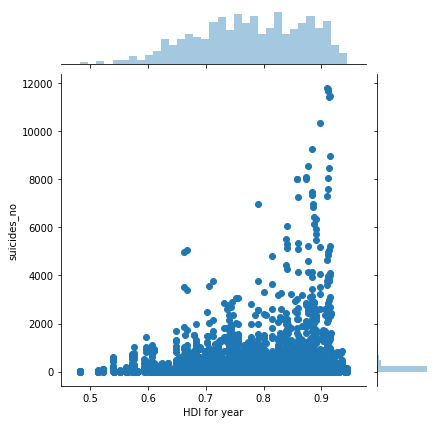

In [12]:
sns.jointplot(x='HDI for year', y='suicides_no', data=data)

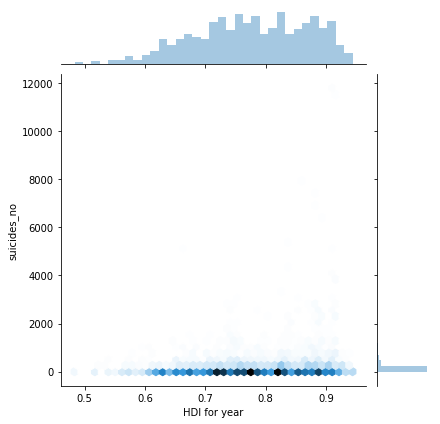

In [13]:
sns.jointplot(x='HDI for year', y='suicides_no', data=data, kind='hex')

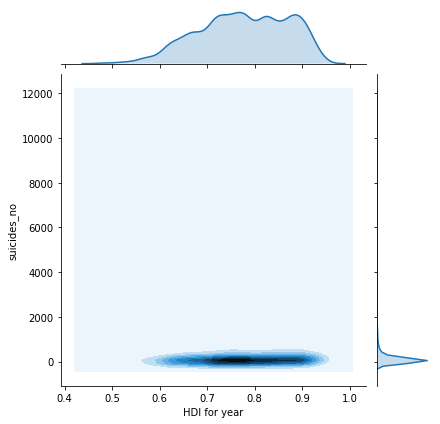

In [14]:
sns.jointplot(x='HDI for year', y='suicides_no', data=data, kind='kde')

#### "Парные диаграммы"

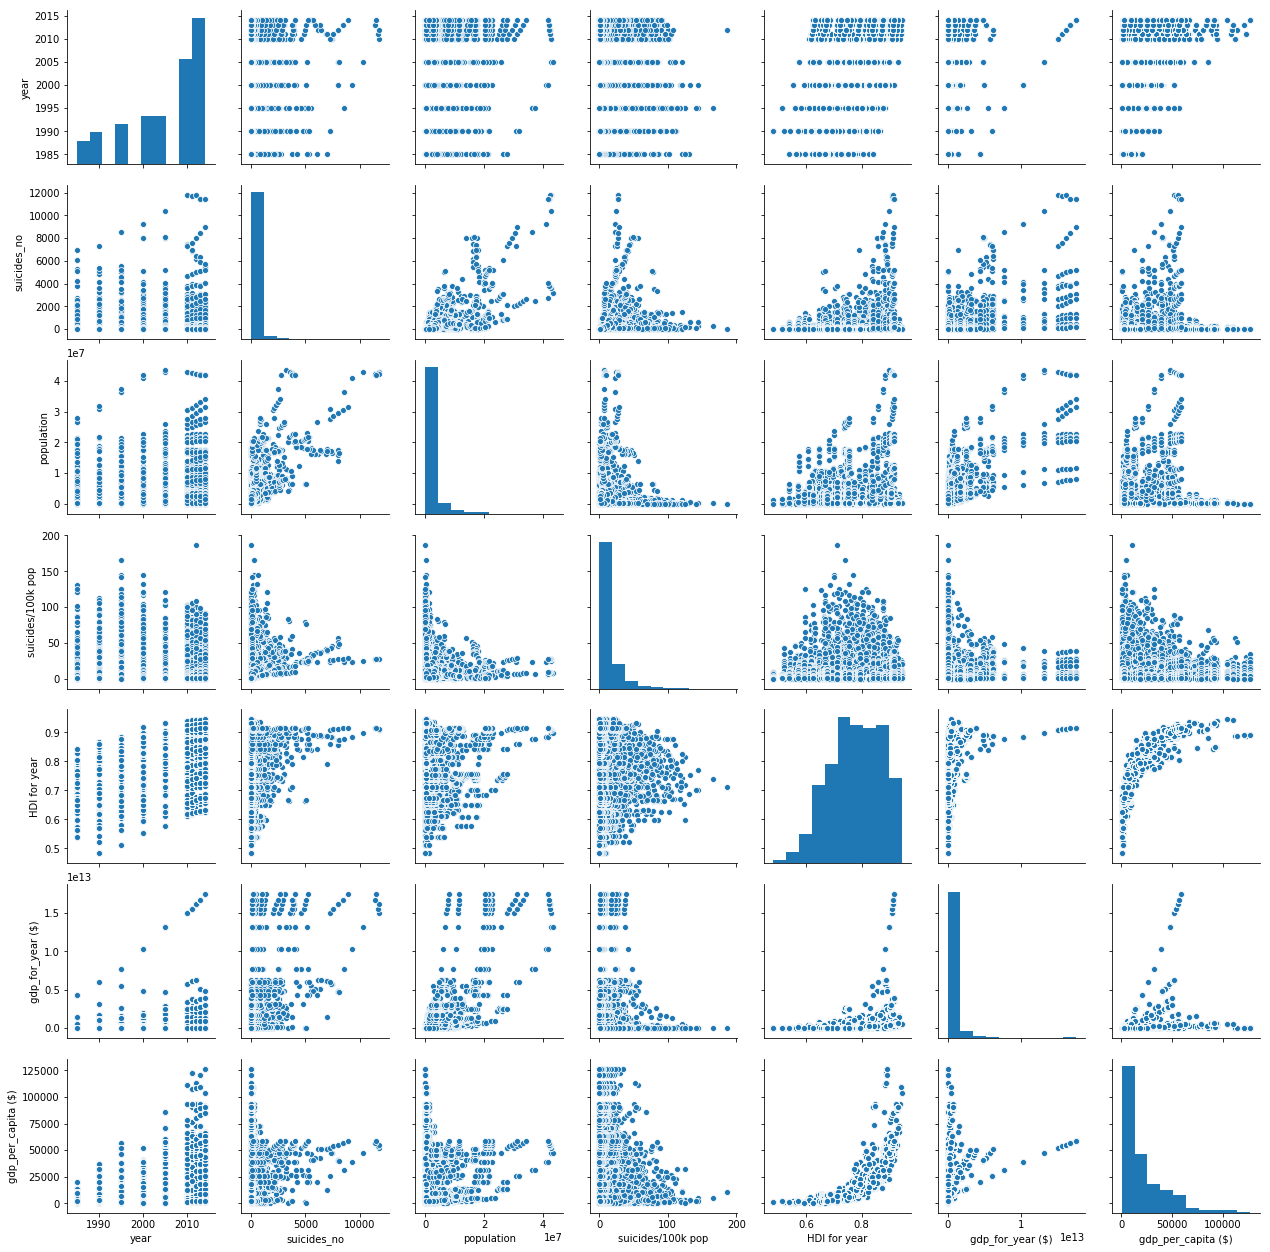

In [15]:
sns.pairplot(data)

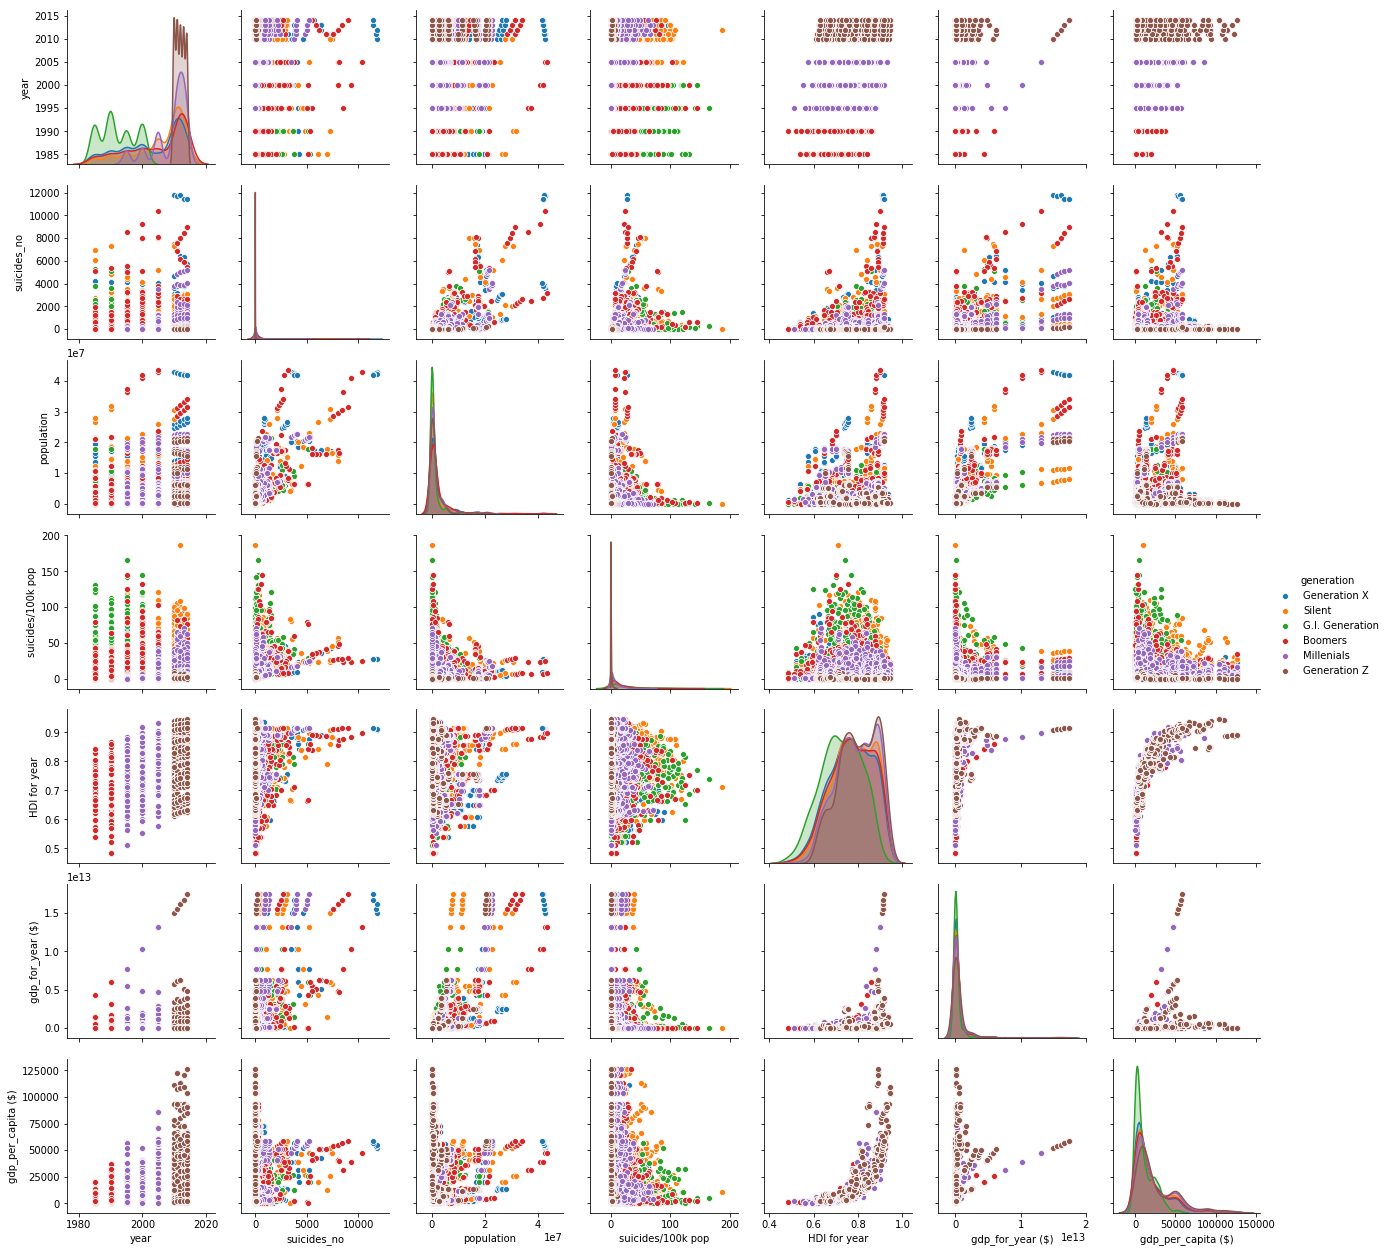

In [16]:
sns.pairplot(data, hue='generation')

#### Ящик с усами

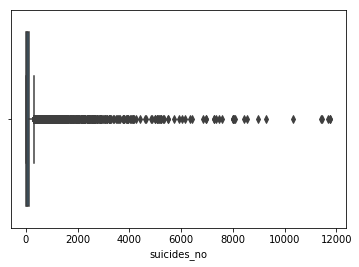

In [17]:
sns.boxplot(x=data['suicides_no'])

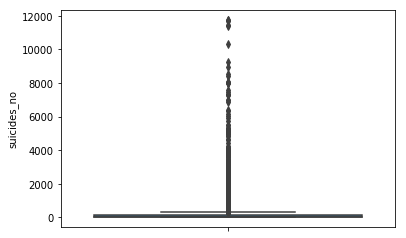

In [18]:
sns.boxplot(y=data['suicides_no'])

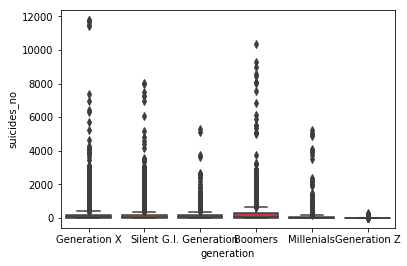

In [19]:
sns.boxplot(x='generation', y='suicides_no', data=data)

#### Violin plot

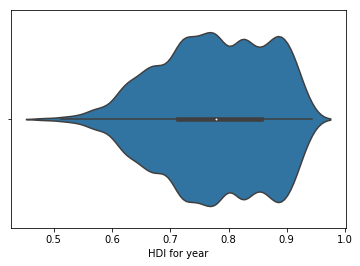

In [20]:
sns.violinplot(x=data['HDI for year'])

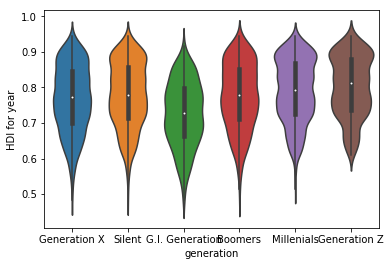

In [21]:
sns.violinplot(x='generation', y='HDI for year', data=data)

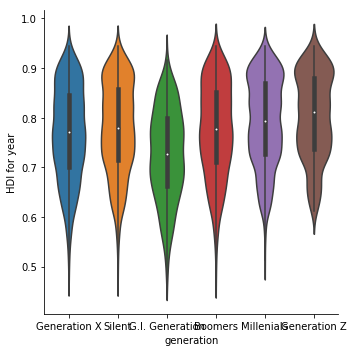

In [22]:
sns.catplot(x='generation', y='HDI for year', data=data, kind="violin", split=True)

### 4) Информация о корреляции признаков

In [23]:
data.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.024297,-0.012628,-0.077410,0.366786,0.079105,0.297888
suicides_no,-0.024297,1.000000,0.698758,0.237169,0.151399,0.607203,0.105182
population,-0.012628,0.698758,1.000000,-0.023197,0.102943,0.750296,0.073701
suicides/100k pop,-0.077410,0.237169,-0.023197,1.000000,0.074279,0.020231,-0.002339
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.305193,0.771228
gdp_for_year ($),0.079105,0.607203,0.750296,0.020231,0.305193,1.000000,0.275643
gdp_per_capita ($),0.297888,0.105182,0.073701,-0.002339,0.771228,0.275643,1.000000


In [24]:
data.corr(method='pearson') # по умолчанию

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.024297,-0.012628,-0.077410,0.366786,0.079105,0.297888
suicides_no,-0.024297,1.000000,0.698758,0.237169,0.151399,0.607203,0.105182
population,-0.012628,0.698758,1.000000,-0.023197,0.102943,0.750296,0.073701
suicides/100k pop,-0.077410,0.237169,-0.023197,1.000000,0.074279,0.020231,-0.002339
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.305193,0.771228
gdp_for_year ($),0.079105,0.607203,0.750296,0.020231,0.305193,1.000000,0.275643
gdp_per_capita ($),0.297888,0.105182,0.073701,-0.002339,0.771228,0.275643,1.000000


In [25]:
data.corr(method='kendall')

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.030382,-0.014514,-0.042359,0.234793,0.123667,0.233916
suicides_no,-0.030382,1.000000,0.575942,0.542566,0.121828,0.450226,0.055232
population,-0.014514,0.575942,1.000000,0.117592,0.090117,0.573964,0.035116
suicides/100k pop,-0.042359,0.542566,0.117592,1.000000,0.099305,0.126114,0.043455
HDI for year,0.234793,0.121828,0.090117,0.099305,1.000000,0.435299,0.762445
gdp_for_year ($),0.123667,0.450226,0.573964,0.126114,0.435299,1.000000,0.409464
gdp_per_capita ($),0.233916,0.055232,0.035116,0.043455,0.762445,0.409464,1.000000


In [26]:
data.corr(method='spearman')

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.042841,-0.020724,-0.060357,0.329094,0.173595,0.327475
suicides_no,-0.042841,1.000000,0.762456,0.717508,0.184755,0.619786,0.084085
population,-0.020724,0.762456,1.000000,0.179320,0.133076,0.765920,0.053653
suicides/100k pop,-0.060357,0.717508,0.179320,1.000000,0.152627,0.187876,0.067476
HDI for year,0.329094,0.184755,0.133076,0.152627,1.000000,0.612349,0.928608
gdp_for_year ($),0.173595,0.619786,0.765920,0.187876,0.612349,1.000000,0.591147
gdp_per_capita ($),0.327475,0.084085,0.053653,0.067476,0.928608,0.591147,1.000000


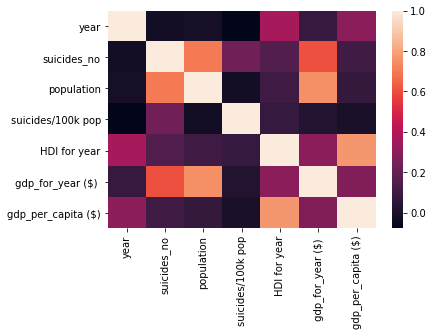

In [27]:
sns.heatmap(data.corr())

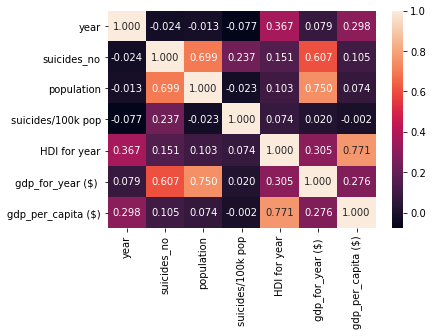

In [28]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

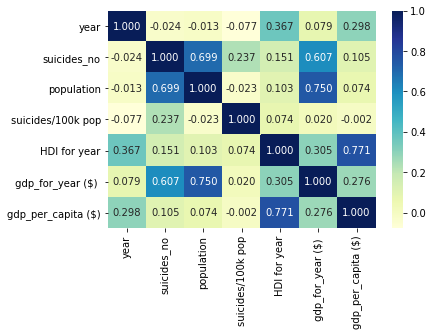

In [29]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

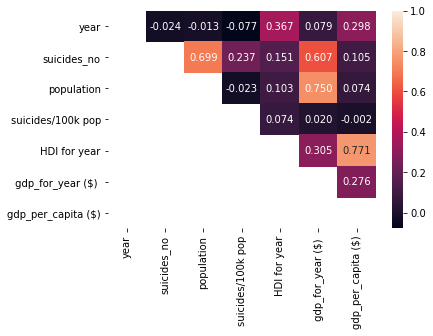

In [30]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

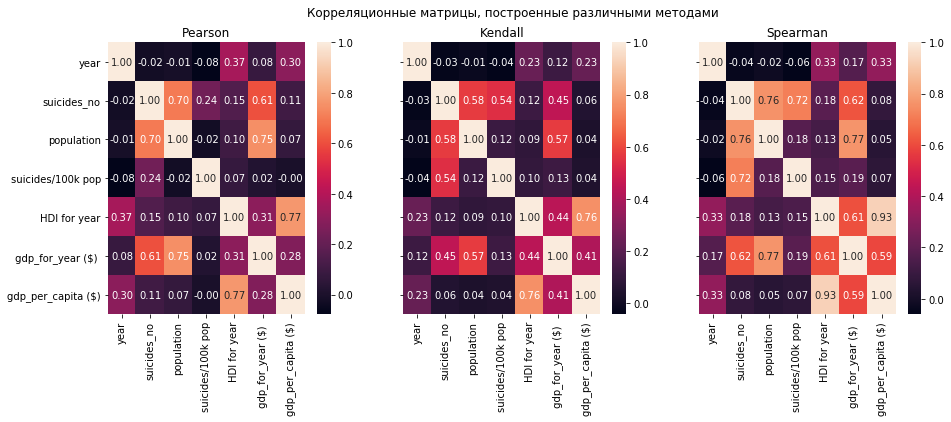

In [31]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Как видно, отличия между различными методами построения корреляционной матрицы незначительны.